In [166]:
import torch.nn as nn
import torch
import numpy as np
from torch import exp, where, erf, tensor, sin, cos
from torch import pow as POW
from numpy import pi
import matplotlib.pyplot as plt

In [ ]:
#https://arxiv.org/abs/2112.11687
#custom grad activation function helper for squareplus
class squarePlus_helper(torch.autograd.Function):
        
    @staticmethod
    def forward(ctx, data:tensor):

        val = POW(data, 2) + 1
        
        ctx.save_for_backward(data, val)

        return 0.5*(POW(val, 0.5) + data - 1) 
        
    @staticmethod
    def backward(ctx, grad_output:tensor):

        (data, val) = ctx.saved_tensors

        grad = 0.5*(1 + data*POW(val, -0.5))
        
        return grad*grad_output

class squarePlus(nn.Module):

    def __init__(self) -> None:
        super(squarePlus, self).__init__()
        self.fn =  squarePlus_helper.apply

    def forward(self, x) -> tensor:

        return self.fn(x)

In [168]:
#https://arxiv.org/abs/2306.01822
#custom grad activation function helper for erf plus
class erfRelu_helper(torch.autograd.Function):
        
    @staticmethod
    def forward(ctx, data:tensor):
        
        ctx.save_for_backward(data)

        return where(data < 0, np.sqrt(pi)/2*erf(data), data) #+ np.sqrt(pi)/2
        
    @staticmethod
    def backward(ctx, grad_output:tensor):
        
        (data, ) = ctx.saved_tensors

        grad = where(data < 0, exp(-POW(data, 2)), 1)
        
        return grad*grad_output

#Our custom grad function as a nn.Module 
class erfRelu(nn.Module):

    def __init__(self) -> None:
        super(erfRelu, self).__init__()
        self.fn = erfRelu_helper.apply

    def forward(self, x) -> tensor:

        return self.fn(x)

In [ ]:
#Our custom grad activation function helper for erf plus
class erfPlus_helper(torch.autograd.Function):
        
    @staticmethod
    def forward(ctx, data:tensor):
        
        a = np.sqrt(np.pi)/2
        
        grad = where(data < 0, -erf(a*POW(data, -1)), 1)
        
        ctx.save_for_backward(data, grad)

        return data*grad
        
    @staticmethod
    def backward(ctx, grad_output:tensor):
        
        a = np.sqrt(np.pi)/2
        
        (data, grad) = ctx.saved_tensors

        val = a*POW(data, -1)

        grad = grad + where(data < 0, 2/np.sqrt(np.pi)*val*exp(-POW(val, 2)), 0)
        
        return grad*grad_output

#Our custom grad function as a nn.Module 
class erfPlus(nn.Module):

    def __init__(self) -> None:
        super(erfPlus, self).__init__()
        self.fn = erfPlus_helper.apply

    def forward(self, x) -> tensor:

        return self.fn(x)

In [170]:
#Our custom grad activation function helper for erf minus
class erfMinus_helper(torch.autograd.Function):
        
    @staticmethod
    def forward(ctx, data:tensor):
        
        #normalization factor 
        data = 2*data +1/3 
        
        grad = where(data < 0, 0, exp(-POW(data, -2)))
        
        ctx.save_for_backward(2*grad)
    
        grad = data*grad + where(data < 0, 0, np.sqrt(pi)*erf(POW(data, -1)) - np.sqrt(pi))

        return grad
        
    @staticmethod
    def backward(ctx, grad_output:tensor):
        
        (grad, ) = ctx.saved_tensors

        return grad*grad_output

#Our custom grad function as a nn.Module 
class erfMinus(nn.Module):

    def __init__(self) -> None:
        super(erfMinus, self).__init__()
        self.fn = erfMinus_helper.apply

    def forward(self, x) -> tensor:

        return self.fn(x)

In [ ]:
#Our custom grad activation function helper for erf plus
class erfPlus2_helper(torch.autograd.Function):
        
    @staticmethod
    def forward(ctx, data:tensor):
        
        a = np.pi**(-1/2)

        val = a*POW(data, -1)
        
        grad = where(data < 0, 1-exp(-POW(val, 2)), 1)
        
        ctx.save_for_backward(grad)
        
        grad = data*grad - where(data < 0, a*np.sqrt(np.pi)*(erf(val)+1), 0)

        return grad
        
    @staticmethod
    def backward(ctx, grad_output:tensor):
        
        (grad, ) = ctx.saved_tensors
        
        return grad*grad_output

#Our custom grad function as a nn.Module 
class erfPlus2(nn.Module):

    def __init__(self) -> None:
        super(erfPlus2, self).__init__()
        self.fn = erfPlus2_helper.apply

    def forward(self, x) -> tensor:

        return self.fn(x)

In [ ]:

#Our custom grad activation function helper for erf plus
class erfPlus3_helper(torch.autograd.Function):
        
    @staticmethod
    def forward(ctx, data:tensor):
        
        a = np.sqrt(np.pi)/2
        
        val = POW(data, -1)
        
        grad = where(data < 0, -erf(a*val), 1)
        
        grad_der = grad + where(data < 0, val*exp(-POW(a*val, 2)), 0)
        
        ctx.save_for_backward(grad_der)

        return data*grad
        
    @staticmethod
    def backward(ctx, grad_output:tensor):
        
        (grad, ) = ctx.saved_tensors
        
        return grad*grad_output

#Our custom grad function as a nn.Module 
class erfPlus3(nn.Module):

    def __init__(self) -> None:
        super(erfPlus3, self).__init__()
        self.fn = erfPlus3_helper.apply

    def forward(self, x) -> tensor:

        return self.fn(x)

In [192]:
#https://arxiv.org/abs/2112.11687
#custom grad activation function helper for squareplus
class degreePlus_helper(torch.autograd.Function):
        
    @staticmethod
    def forward(ctx, data:tensor):

        a = 2*4

        val = POW(data, a) + 1
        
        ctx.save_for_backward(data, val)

        return 0.5*(POW(val, 1/a) + data) 
        
    @staticmethod
    def backward(ctx, grad_output:tensor):

        a = 2*4 

        (data, val) = ctx.saved_tensors

        grad = 0.5*(1 + data**(a-1)*POW(val, 1/a-1))
        
        return grad*grad_output

class degreePlus(nn.Module):

    def __init__(self) -> None:
        super(degreePlus, self).__init__()
        self.fn =  degreePlus_helper.apply

    def forward(self, x) -> tensor:

        return self.fn(x)

In [193]:
c = 1

In [194]:
if c == 1: 

    #Test function and to see if backward works 
    torch.manual_seed(2)
    
    #testing_actFunc = erfMinus()
    testing_actFunc = erfPlus()
    #testing_actFunc = erfPlus2()
    #testing_actFunc = erfPlus3()
    #testing_actFunc = erfRelu()
    #testing_actFunc = squarePlus()
    #testing_actFunc = degreePlus()

    data = torch.randn(50, dtype=torch.float64, requires_grad=True) 
    
    try: 
        torch.autograd.gradcheck(testing_actFunc, data, eps=1e-8, atol=1e-7) 
        print('Gradient function is correct')
    except: 
        print('Gradient function is NOT correct')

Gradient function is correct


In [195]:
#torch.autograd.gradcheck(testing_actFunc, data, eps=1e-8, atol=1e-7)

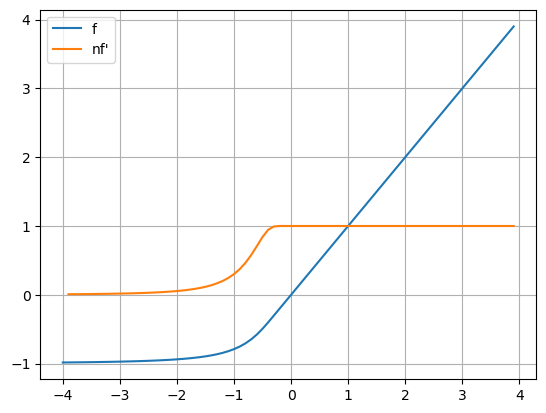

In [196]:
#Test if the function plots correct graph 
if c == 1: 
    dt = 0.1
    datax = torch.arange(-4, 4, dt, dtype=torch.float64, requires_grad=True) 
    
    datay = testing_actFunc.forward(datax)

    datad = (datay[1:]-datay[:-1])/dt
    
    plt.plot(datax.detach().numpy(), datay.detach().numpy(), label="f")
    plt.plot(datax[1:].detach().numpy(), datad.detach().numpy(), label="nf'")
    plt.grid()
    plt.legend()
    plt.show()